### Packages for Graphics

In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preprocessing

### Packages for Data Preprocessing

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

### Load the dataset

In [5]:
datasets_dir = '../Datasets/'
csv_path = os.path.join(datasets_dir, 'cheating_dataset.csv')
csv_path
raw_df = pd.read_csv(csv_path)

In [6]:
raw_df

,participant_id,age,sex,society_type,university_degree,education_subject,appear_online_test_2_years,condition,time_question,device_changed_question,...,feeling_aware,feeling_normal,feeling_disciplined,feeling_motivated,feeling_proud,feeling_convinced,positive_views_on_others,negative_views_on_others,neutral_views_on_others,similar_views_on_others
0,P1,20.0,0.0,0,1,STEM,NaN,Honor code reminder,176,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,P2,36.0,0.0,0,1,Social,31 or above,Monitoring,90,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,P3,20.0,0.0,0,1,Business,31 or above,Warning,157,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,P4,28.0,0.0,0,0,Business,6-10,Honor code reminder,147,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,P5,23.0,0.0,0,1,Healthcare,31 or above,Control,211,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,P991,28.0,1.0,0,0,Social,21-30,Monitoring,93,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3882,P989,25.0,1.0,0,0,Business,NaN,Warning,111,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3883,P993,45.0,0.0,0,0,Other,6-10,Honor code reminder,32,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3884,P990,26.0,0.0,0,0,Business,31 or above,Control,36,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
columns_to_exclude_by_name = ['cheated_overall', 'device_changed_overall', 'device_changed_question', 'browser_changed_overall', 'browser_changed_question','test_score', 'UX_overall', 'question_number', 'stopped_cheating']
columns_to_exclude_by_index = raw_df.columns[21:41]
columns_to_exclude = list(columns_to_exclude_by_name) + list(columns_to_exclude_by_index)
raw_df_filtered = raw_df.drop(columns=columns_to_exclude)
raw_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   participant_id                 3886 non-null   object 
 1   age                            3857 non-null   float64
 2   sex                            3851 non-null   float64
 3   society_type                   3886 non-null   int64  
 4   university_degree              3886 non-null   int64  
 5   education_subject              3802 non-null   object 
 6   appear_online_test_2_years     3142 non-null   object 
 7   condition                      3886 non-null   object 
 8   time_question                  3886 non-null   int64  
 9   answer_correct                 3886 non-null   int64  
 10  cheated_question               3886 non-null   int64  
 11  UX_Pragmatic                   3886 non-null   float64
 12  UX_Hedonic                     3886 non-null   f

In [109]:
# setup for matplotlib and sns
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [42]:
# fig = px.histogram(raw_df_filtered, 
#                    x='time_question', 
#                    marginal='box', 
#                    color='cheated_question',
#                    nbins=47, 
#                    title='Time taken and cheating')
# fig.update_layout(bargap=0.1)
# fig.show()

In [43]:
# #px.histogram(raw_df, x='time_question', title='Cheating vs time taken', color='cheated_question')
# fig = px.scatter(raw_df,
# # fig = px.scatter(medical_df[medical_df.smoker=='no'], 
#                  x='negative_emotion', 
#                  y='time_question', 
#                  color='cheated_question', 
#                  opacity=0.8, 
#                  hover_data=['sex'], 
#                  title='Time Taken vs Cheating')
# fig.update_traces(marker_size=5)
# fig.show()

In [44]:
# fig = px.violin(raw_df, x='question_number', y='cheated_question')
# fig.show()

### Inputs and targets for Training, Validation and Testing datasets

In [110]:
# Create training, validation and test sets
train_val_df, test_df = train_test_split(raw_df_filtered, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

# Create inputs and targets
# input_cols = list(train_df.columns)[1:-1]
target_col = 'cheated_question'
input_cols = [col for col in raw_df_filtered.columns if col != target_col]

def create_inputs_and_targets(df):
    return df[input_cols].copy(), df[target_col].copy()

train_inputs, train_targets = create_inputs_and_targets(train_df)
val_inputs, val_targets = create_inputs_and_targets(val_df)
test_inputs, test_targets = create_inputs_and_targets(test_df)


In [111]:
# Identify numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

# Identify binary columns (columns with only 0 and 1 values)
scaled_numeric_cols = [col for col in numeric_cols if train_inputs[col].dropna().between(0, 1).all()]
non_scaled_numeric_cols = [col for col in numeric_cols if col not in scaled_numeric_cols]

# Identify categorical columns
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()[1:]

In [112]:
categorical_cols

['education_subject', 'appear_online_test_2_years', 'condition']

In [113]:
train_inputs.describe()

,age,sex,society_type,university_degree,time_question,answer_correct,UX_Pragmatic,UX_Hedonic,positive_emotion,negative_emotion,...,feeling_aware,feeling_normal,feeling_disciplined,feeling_motivated,feeling_proud,feeling_convinced,positive_views_on_others,negative_views_on_others,neutral_views_on_others,similar_views_on_others
count,2315.000000,2310.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,...,1731.000000,1731.000000,1731.000000,1731.000000,1731.00000,1731.000000,1731.000000,1731.00000,1731.000000,1731.000000
mean,38.552052,0.503030,0.084084,0.566710,85.830974,0.026598,0.659159,0.324324,2.896225,1.785929,...,0.025419,0.035817,0.052571,0.012709,0.00751,0.004044,0.150780,0.18082,0.049682,0.414789
std,13.023655,0.500099,0.277573,0.495636,49.476571,0.160940,1.559833,1.268986,0.787958,0.674845,...,0.157439,0.185888,0.223239,0.112050,0.08636,0.063481,0.357938,0.38498,0.217350,0.492828
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,0.000000,49.000000,0.000000,-0.500000,-0.500000,2.300000,1.300000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,36.000000,1.000000,0.000000,1.000000,80.000000,0.000000,1.000000,0.500000,2.900000,1.600000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,49.000000,1.000000,0.000000,1.000000,116.000000,0.000000,2.000000,1.250000,3.500000,2.100000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000
max,71.000000,1.000000,1.000000,1.000000,357.000000,1.000000,3.000000,3.000000,5.000000,4.600000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


### Imputing, Scaling and Encoding

In [114]:
# Identify numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

# Identify binary columns (columns with only 0 and 1 values)
scaled_numeric_cols = [col for col in numeric_cols if train_inputs[col].between(0, 1).all()]
non_scaled_numeric_cols = [col for col in numeric_cols if col not in scaled_numeric_cols]

# Identify categorical columns
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()[1:]

# Function for transforming inputs (Impute, Scale, One-hot encode)
def preprocess_data(inputs, imputer, scaler, encoder):
    inputs[numeric_cols] = imputer.transform(inputs[numeric_cols])
    inputs[non_scaled_numeric_cols] = scaler.transform(inputs[non_scaled_numeric_cols])
    inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])  
    return inputs[numeric_cols+encoded_cols]

# Impute missing values and scale numeric columns
imputer = SimpleImputer(strategy='mean').fit(raw_df_filtered[numeric_cols])
scaler = MinMaxScaler().fit(raw_df_filtered[non_scaled_numeric_cols])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df_filtered[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Transform all inputs
train_inputs = preprocess_data(train_inputs, imputer, scaler, encoder)
val_inputs = preprocess_data(val_inputs, imputer, scaler, encoder)
test_inputs = preprocess_data(test_inputs, imputer, scaler, encoder)


In [115]:
train_inputs.describe()

,age,sex,society_type,university_degree,time_question,answer_correct,UX_Pragmatic,UX_Hedonic,positive_emotion,negative_emotion,...,appear_online_test_2_years_1-5,appear_online_test_2_years_11-20,appear_online_test_2_years_21-30,appear_online_test_2_years_31 or above,appear_online_test_2_years_6-10,appear_online_test_2_years_nan,condition_Control,condition_Honor code reminder,condition_Monitoring,condition_Warning
count,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,...,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000
mean,0.387761,0.503009,0.084084,0.566710,0.174099,0.026598,0.609860,0.554054,0.474056,0.218314,...,0.406692,0.078936,0.042900,0.150150,0.132132,0.189189,0.255684,0.245388,0.247104,0.251823
std,0.244884,0.497840,0.277573,0.495636,0.100358,0.160940,0.259972,0.211498,0.196990,0.187457,...,0.491322,0.269697,0.202675,0.357295,0.338707,0.391743,0.436339,0.430409,0.431420,0.434153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188679,0.000000,0.000000,0.000000,0.099391,0.000000,0.416667,0.416667,0.325000,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.358491,0.500649,0.000000,1.000000,0.162272,0.000000,0.666667,0.583333,0.475000,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.584906,1.000000,0.000000,1.000000,0.235294,0.000000,0.833333,0.708333,0.625000,0.305556,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.724138,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Save the processed datasets

In [116]:
# Define the directory for processed data
processed_data_dir = './processed_data'
# Ensure the 'processed_data' directory exists
os.makedirs(processed_data_dir, exist_ok=True)

# Save processed data inside 'processed_data' folder
for name, df in zip(['train', 'val', 'test'], [train_inputs, val_inputs, test_inputs]):
    # Save the inputs
    input_path = os.path.join(processed_data_dir, f'{name}_inputs.parquet')
    df.to_parquet(input_path)
    
    # Save the targets
    target_path = os.path.join(processed_data_dir, f'{name}_targets.parquet')
    pd.DataFrame(eval(f'{name}_targets')).to_parquet(target_path)

## Model Training and Evaluation

### Packages for Training and Evaluation Metrics

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

### Training and Saving the Model

In [197]:
# Select the columns to be used for training/prediction (discarding categorical columns)
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Create and train the model
# model = LogisticRegression(solver='liblinear')
model = DecisionTreeClassifier(random_state=42)
# model = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=500)
model.fit(X_train, train_targets)


# Define the directory for saving the model
saved_model_dir = './model'
# Ensure the 'model' directory exists
os.makedirs(saved_model_dir, exist_ok=True)
# Define the full path to save the model file inside the 'model' folder
model_path = os.path.join(saved_model_dir, 'cheating_prediction.joblib')

# Save the trained model
joblib.dump({'model': model, 'imputer': imputer, 'scaler': scaler, 'encoder': encoder,
             'input_cols': input_cols, 'numeric_cols': numeric_cols, 'encoded_cols': encoded_cols}, model_path)



['./model/cheating_prediction.joblib']

### Prediction and Evaluation of the Model

#### Feature importance

##### Logistic Regression

/var/folders/9x/l7cjx6vd0518z9mfnzrvbtt97pcxk7/T/ipykernel_3117/829165036.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




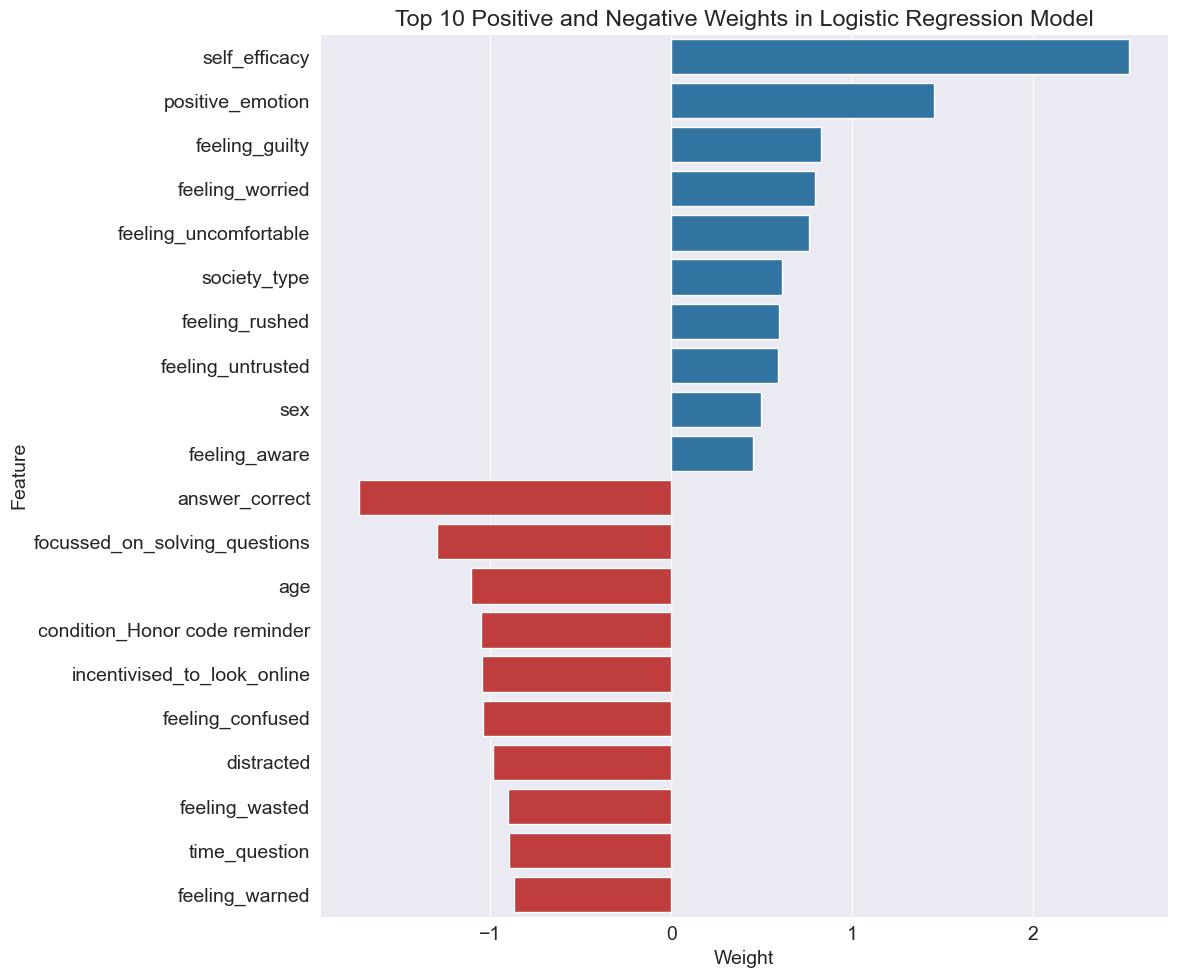

In [195]:
weights_df = pd.DataFrame({
    'feature': numeric_cols + encoded_cols,
    'weight': model.coef_.tolist()[0]
})
weights_df = weights_df.sort_values('weight', ascending=False)


top_10 = weights_df[weights_df['weight'] > 0].head(10)
bottom_10 = weights_df[weights_df['weight'] <= 0].tail(10)

top_bottom_weights = pd.concat([top_10, bottom_10[::-1]])

# Create a barplot
plt.figure(figsize=(12, 10))
sns.barplot(data=top_bottom_weights, x='weight', y='feature', 
            palette=['#1f77b4' if x > 0 else '#d62728' for x in top_bottom_weights['weight']])

plt.title('Top 10 Positive and Negative Weights in Logistic Regression Model')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##### Decision Tree and Random Forest

                   feature  importance
4            time_question    0.202313
10           self_efficacy    0.117520
9         negative_emotion    0.096562
0                      age    0.093090
8         positive_emotion    0.081563
7               UX_Hedonic    0.041492
6             UX_Pragmatic    0.031013
13             not_noticed    0.024813
11  preference_for_message    0.021138
3        university_degree    0.018531


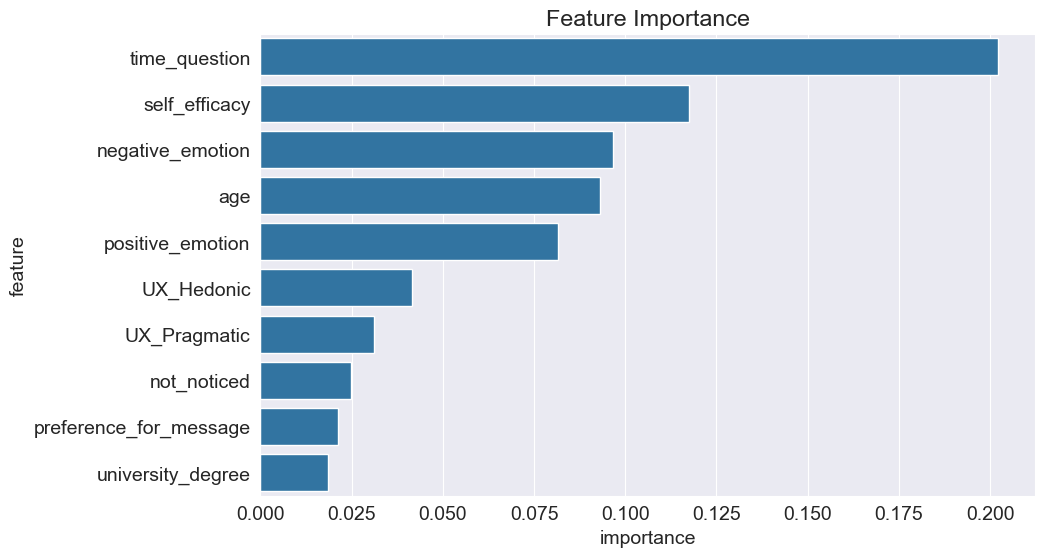

In [198]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(importance_df.head(10))

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');


#### Confusion Matrix, Accuracy and Other Graphics ####

Training Accuracy: 100.00%


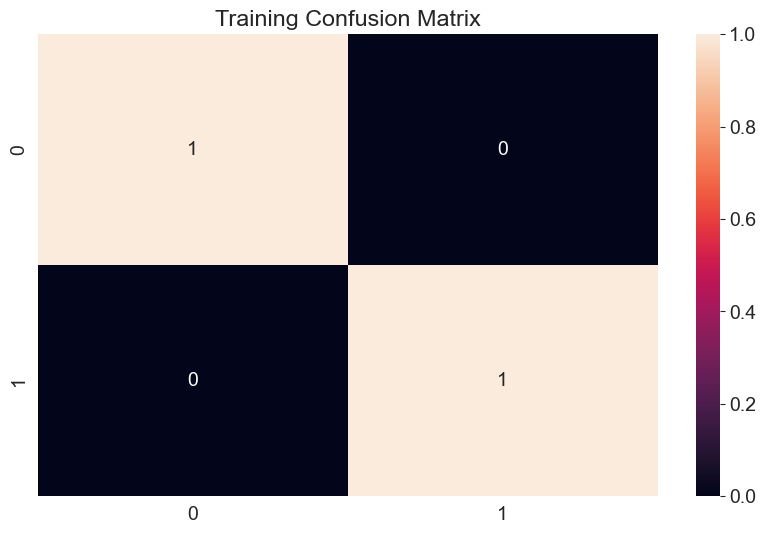

Validation Accuracy: 93.82%


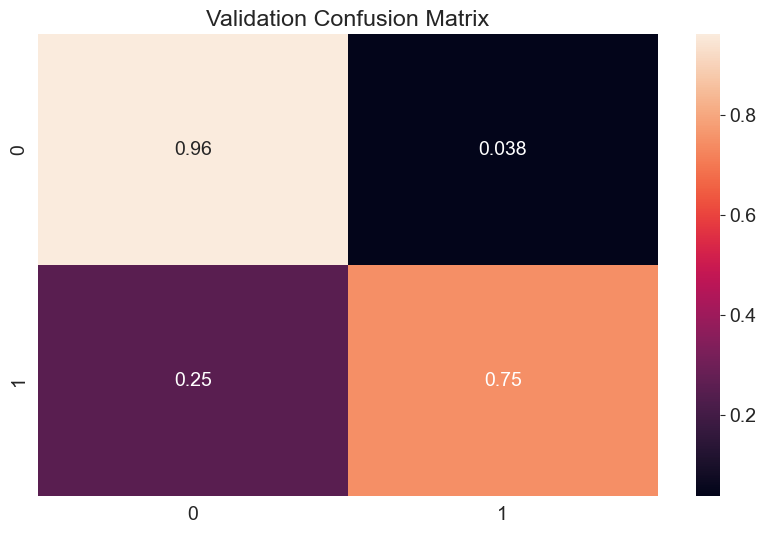

Test Accuracy: 93.44%


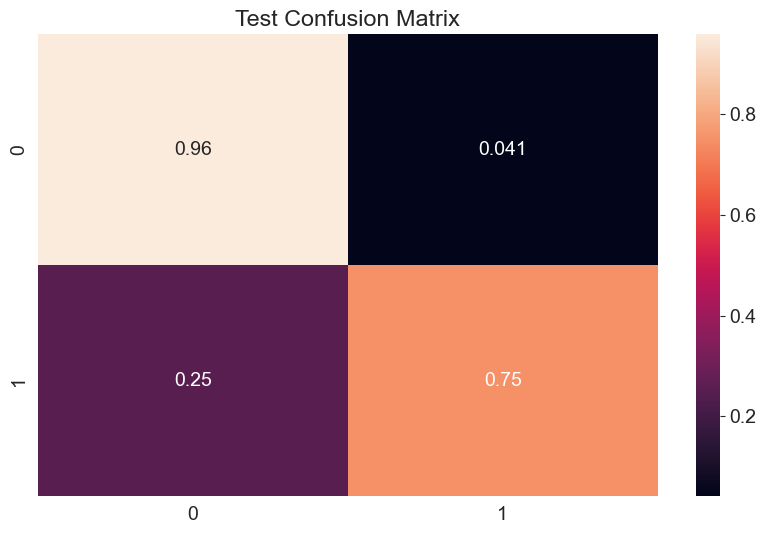

In [199]:
# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

# Helper function to predict and plot
def predict_and_plot(inputs, targets, name):
    preds = model.predict(inputs)
    # print(f"{name} Prob. Distribution: {model.predict_proba(inputs)}")
    accuracy = accuracy_score(targets, preds)
    print(f"{name} Accuracy: {accuracy:.2%}")
    
    cf = confusion_matrix(targets, preds, normalize='true')
    sns.heatmap(cf, annot=True)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Evaluate on validation and test set
train_preds = predict_and_plot(X_train, train_targets, 'Training')
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')

# model = joblib.load('aussie_rain.joblib')

##### Decision Tree Graphics and Hyperparameter Tuning #####

20

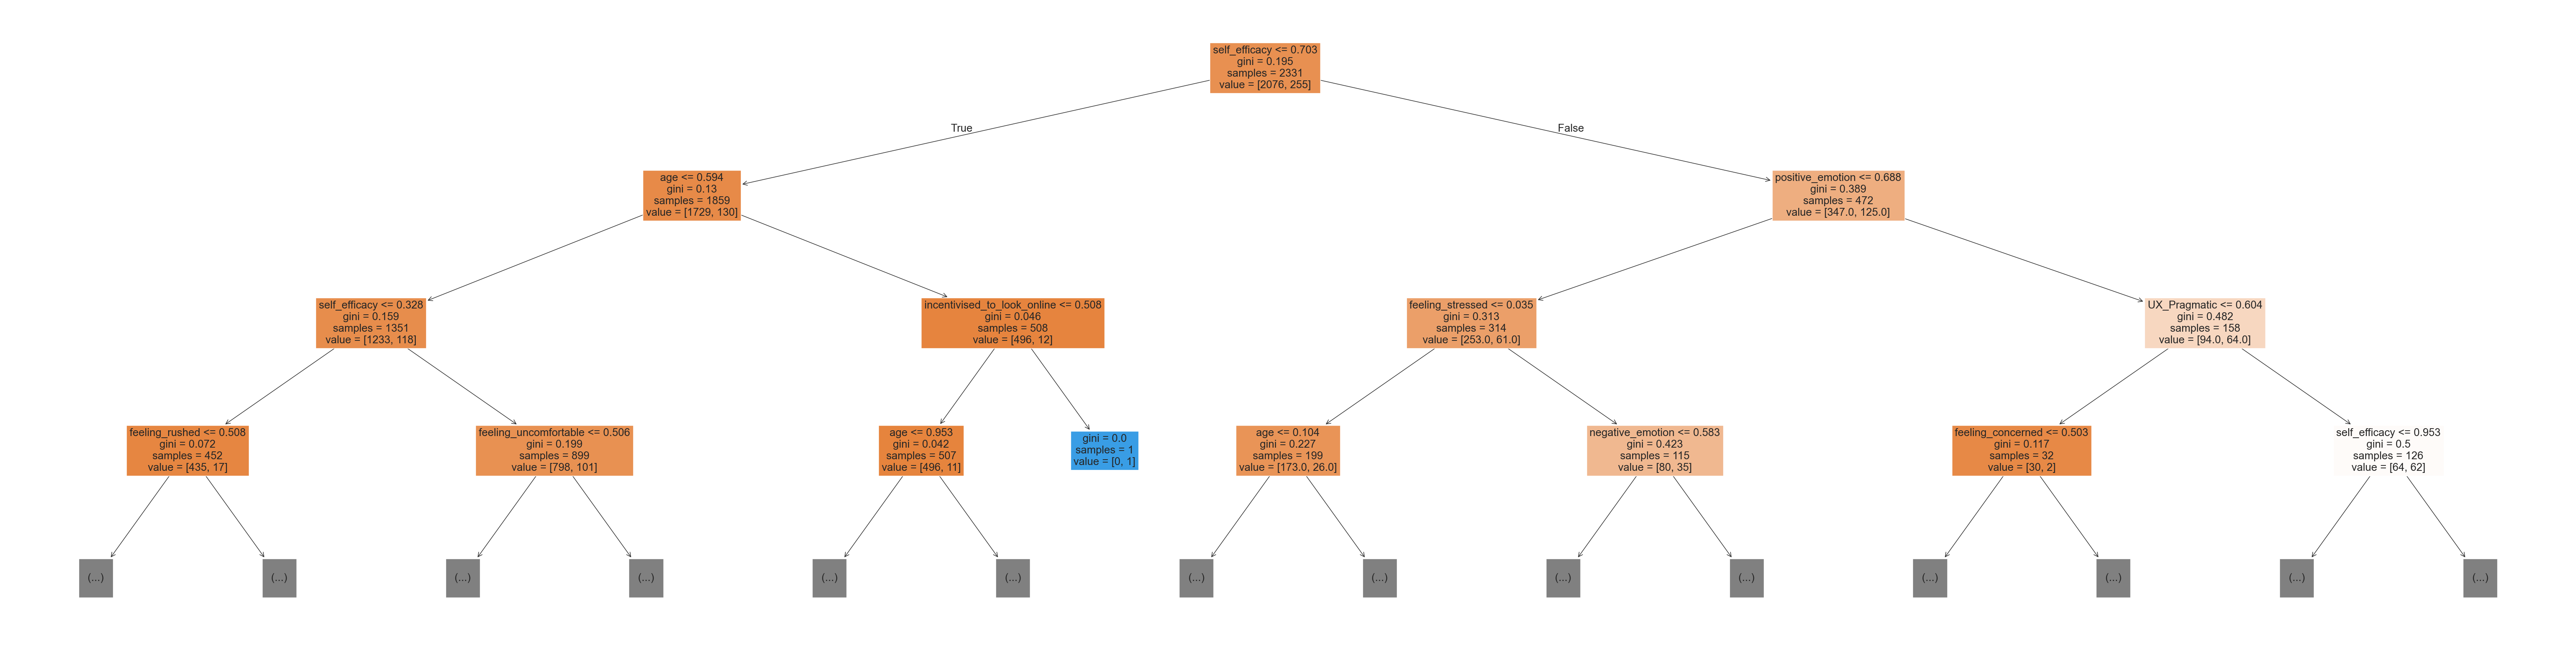

In [178]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True)

model.tree_.max_depth

In [148]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- self_efficacy <= 0.70
|   |--- age <= 0.59
|   |   |--- self_efficacy <= 0.33
|   |   |   |--- feeling_rushed <= 0.51
|   |   |   |   |--- self_efficacy <= 0.02
|   |   |   |   |   |--- focussed_on_solving_questions <= 0.54
|   |   |   |   |   |   |--- feeling_nervous <= 0.52
|   |   |   |   |   |   |   |--- preference_for_message <= 0.62
|   |   |   |   |   |   |   |   |--- society_type <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- society_type >  0.50
|   |   |   |   |   |   |   |   |   |--- time_question <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- time_question >  0.10
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- preference_for_message >  0.62
|   |   |   |   |   |   |   |   |--- time_question <= 0.11
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- time_question >  0.11
|   |   |   |   |   | 

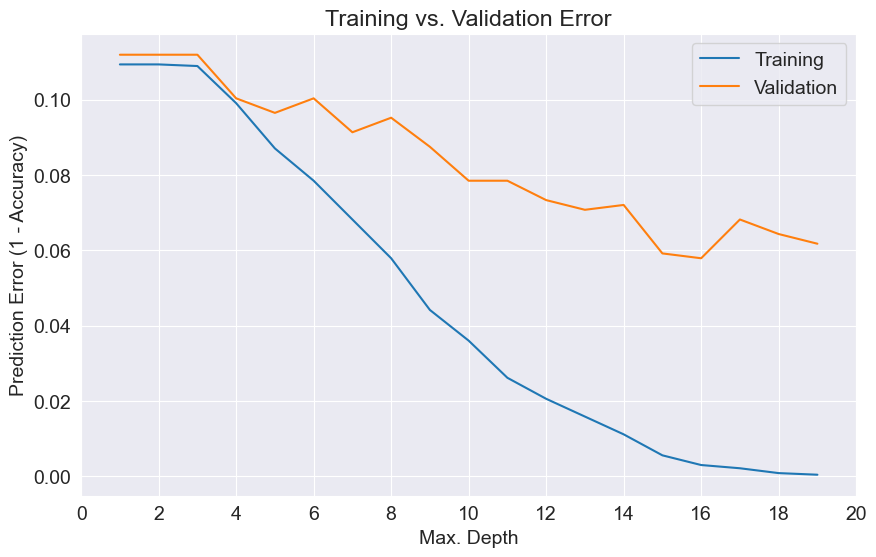

In [177]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 20)])
errors_df

plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0, 21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

##### Random Forest

In [183]:
len(model.estimators_)

100

## Prediction on Single Inputs 

In [13]:
# Function to predict with new input
def predict_input(new_input):
    input_df = pd.DataFrame([new_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

#  new_input = {'Date': '2021-06-19',
#              'Location': 'Launceston',
#              'MinTemp': 23.2,
#              'MaxTemp': 33.2,
#              'Rainfall': 10.2,
#              'Evaporation': 4.2,
#              'Sunshine': np.nan,
#              'WindGustDir': 'NNW',
#              'WindGustSpeed': 52.0,
#              'WindDir9am': 'NW',
#              'WindDir3pm': 'NNE',
#              'WindSpeed9am': 13.0,
#              'WindSpeed3pm': 20.0,
#              'Humidity9am': 89.0,
#              'Humidity3pm': 58.0,
#              'Pressure9am': 1004.8,
#              'Pressure3pm': 1001.5,
#              'Cloud9am': 8.0,
#              'Cloud3pm': 5.0,
#              'Temp9am': 25.7,
#              'Temp3pm': 33.0,
#              'RainToday': 'Yes'}

# predict_input(new_input)

/var/folders/9x/l7cjx6vd0518z9mfnzrvbtt97pcxk7/T/ipykernel_96516/284936462.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
/var/folders/9x/l7cjx6vd0518z9mfnzrvbtt97pcxk7/T/ipykernel_96516/284936462.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
/var/folders/9x/l7cjx6vd0518z9mfnzrvbtt97pcxk7/T/ipykernel_96516/284936462.py:6: PerformanceWarning: DataFrame is highly fragmented.  This

('Yes', np.float64(0.6316466668984417))